<a href="https://colab.research.google.com/github/Pverma-1234/DataScience-ToolBox-Python/blob/main/PractiseQuestions_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Banking26.11_0.csv")
df.head(5)


,Sr.,Year,No. of Offices,Deposit (Rs. in Million),Credit (Rs. in Million),Credit Deposit Ratio (In %)
0,1,2005-06,3730,1050473.0,591983.0,56.35
1,2,2006-07,3826,1192236.0,769159.0,64.51
2,3,2007-08,4039,1526911.0,NaN,65.17
3,4,2008-09,4283,1879058.0,1186841.0,63.16
4,5,2009-10,4572,2164701.0,NaN,65.28


In [ ]:
df.describe()

,Sr.,No. of Offices,Deposit (Rs. in Million),Credit (Rs. in Million),Credit Deposit Ratio (In %)
count,19.000000,19.000000,1.800000e+01,1.400000e+01,14.000000
mean,10.000000,6490.842105,5.096115e+06,3.679146e+06,68.592857
std,5.627314,1846.662583,3.340617e+06,2.414046e+06,5.675482
min,1.000000,3730.000000,1.050473e+06,5.919830e+05,56.350000
25%,5.500000,4732.500000,2.277238e+06,1.834355e+06,65.197500
50%,10.000000,6965.000000,4.471956e+06,3.505236e+06,68.860000
75%,14.500000,8145.000000,7.410566e+06,5.192417e+06,72.007500
max,19.000000,8971.000000,1.195365e+07,8.888605e+06,78.760000


<Axes: >

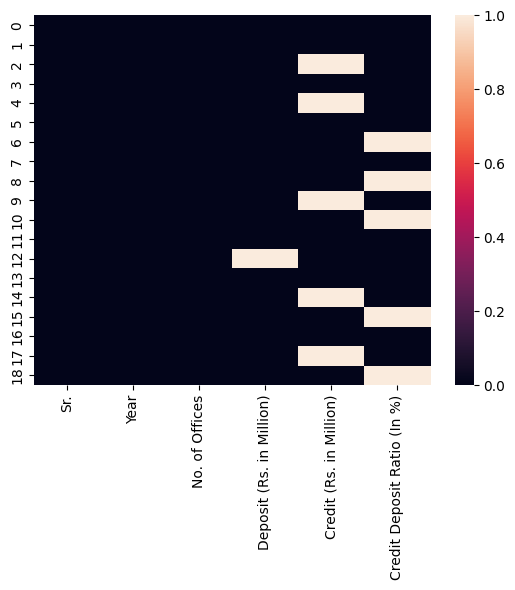

In [ ]:
sns.heatmap(df.isnull())

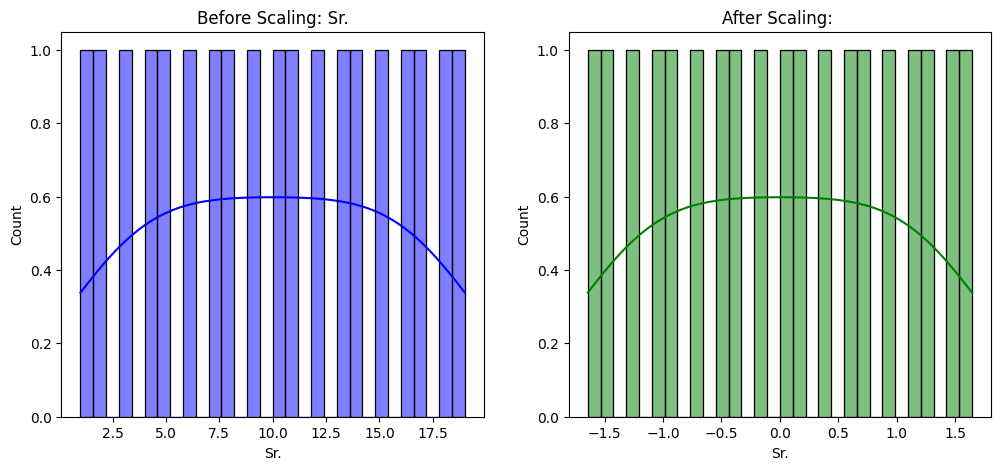

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)



num_col = df.select_dtypes(include=['number']).columns[0]


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[num_col], kde=True, bins=30, color="blue")
plt.title(f"Before Scaling: {num_col}")


scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[[num_col]])


plt.subplot(1, 2, 2)
sns.histplot(df[num_col], kde=True, bins=30, color="green")
plt.title(f"After Scaling: ")

plt.show()

<ipython-input-24-1d2934c4d8c8>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'], palette="viridis")


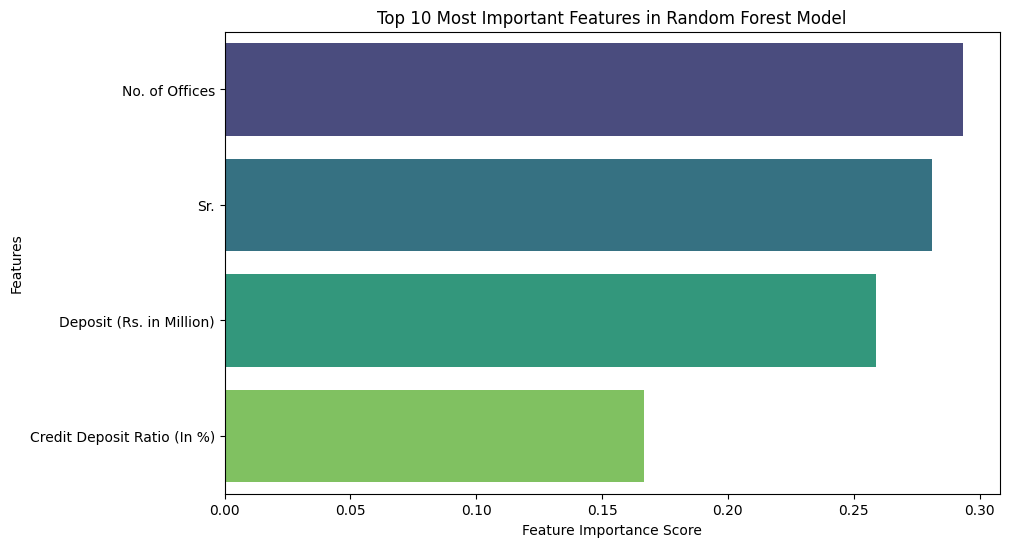

                       Feature  Importance
1               No. of Offices    0.293287
0                          Sr.    0.280964
2     Deposit (Rs. in Million)    0.258969
3  Credit Deposit Ratio (In %)    0.166779


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



target_column = "Credit (Rs. in Million)"

if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Check the column names: {df.columns}")

df_cleaned = df.select_dtypes(include=['number']).fillna(df.mean(numeric_only=True))

X = df_cleaned.drop(columns=[target_column], errors='ignore')
y = df_cleaned[target_column] if target_column in df_cleaned else None

if X.shape[1] == 0:
    raise ValueError("No numeric features found after preprocessing. Please check the dataset.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features in Random Forest Model")
plt.show()

print(top_10_features)


<ipython-input-25-670cad1dafa2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[column].fillna(df_filled[column].mean(), inplace=True)
<ipython-input-25-670cad1dafa2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

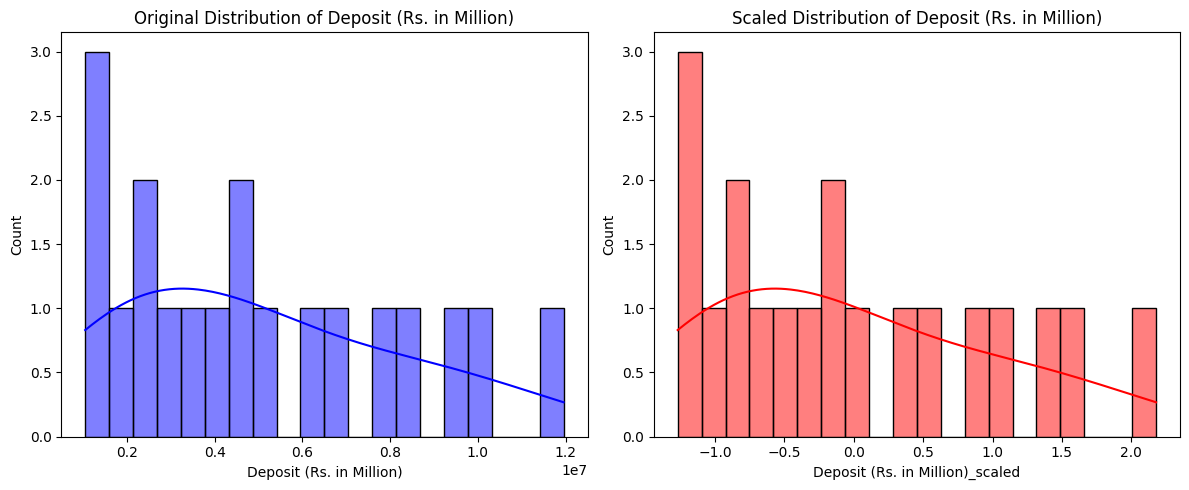

In [ ]:



df_filled = df.copy()
for column in df_filled.columns:
    if df_filled[column].dtype == 'object':
        df_filled[column].fillna(df_filled[column].mode()[0], inplace=True)
    else:
        df_filled[column].fillna(df_filled[column].mean(), inplace=True)


label_encoders = {}
for column in df_filled.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_filled[column] = le.fit_transform(df_filled[column])
    label_encoders[column] = le


num_column = "Deposit (Rs. in Million)"
if num_column not in df_filled.columns:
    raise ValueError(f"Column '{num_column}' not found in dataset. Check available columns: {df_filled.columns}")


scaler = StandardScaler()
df_filled[num_column + "_scaled"] = scaler.fit_transform(df_filled[[num_column]])

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(df_filled[num_column], bins=20, kde=True, color='blue')
plt.title(f"Original Distribution of {num_column}")


plt.subplot(1, 2, 2)
sns.histplot(df_filled[num_column + "_scaled"], bins=20, kde=True, color='red')
plt.title(f"Scaled Distribution of {num_column}")

plt.tight_layout()
plt.show()


Covariance Matrix:
                                       Sr.  No. of Offices  \
Sr.                          1.055556e+00    1.867389e+03   
No. of Offices               1.867389e+03    3.410163e+06   
Deposit (Rs. in Million)     3.233355e+06    5.580683e+09   
Credit (Rs. in Million)      1.739906e+06    3.021218e+09   
Credit Deposit Ratio (In %)  3.305100e+00    6.241358e+03   

                             Deposit (Rs. in Million)  \
Sr.                                      3.233355e+06   
No. of Offices                           5.580683e+09   
Deposit (Rs. in Million)                 1.056024e+13   
Credit (Rs. in Million)                  5.499314e+12   
Credit Deposit Ratio (In %)              8.079487e+06   

                             Credit (Rs. in Million)  \
Sr.                                     1.739906e+06   
No. of Offices                          3.021218e+09   
Deposit (Rs. in Million)                5.499314e+12   
Credit (Rs. in Million)                 4.2150

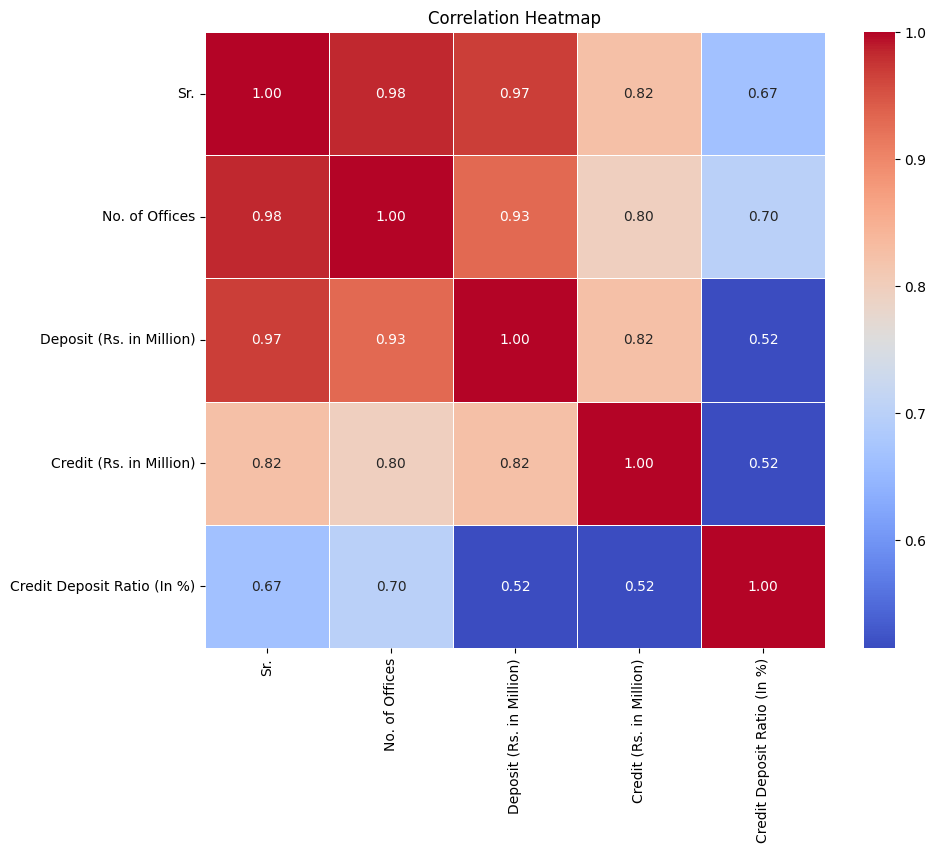


Top 3 Most Positively Correlated Feature Pairs:
 No. of Offices            Sr.               0.984253
Sr.                       No. of Offices    0.984253
Deposit (Rs. in Million)  Sr.               0.968447
dtype: float64

Top 3 Most Negatively Correlated Feature Pairs:
 Credit (Rs. in Million)      Credit Deposit Ratio (In %)    0.516283
Deposit (Rs. in Million)     Credit Deposit Ratio (In %)    0.515315
Credit Deposit Ratio (In %)  Deposit (Rs. in Million)       0.515315
dtype: float64


In [ ]:


df_numeric = df.select_dtypes(include=['number']).fillna(df.mean(numeric_only=True))

cov_matrix = df_numeric.cov()
print("Covariance Matrix:\n", cov_matrix)

corr_matrix = df_numeric.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

top_3_positive = corr_pairs.head(3)

top_3_negative = corr_pairs.tail(3)

print("\nTop 3 Most Positively Correlated Feature Pairs:\n", top_3_positive)
print("\nTop 3 Most Negatively Correlated Feature Pairs:\n", top_3_negative)


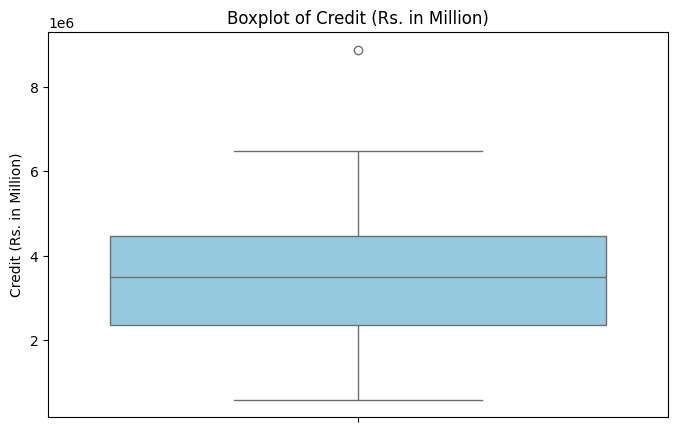

Training set size: (15, 4), Testing set size: (4, 4)


In [ ]:

target_column = "Credit (Rs. in Million)"

if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Check available columns: {df.columns}")

df_numeric = df.select_dtypes(include=['number']).fillna(df.mean(numeric_only=True))

X = df_numeric.drop(columns=[target_column], errors='ignore')
y = df_numeric[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 5))
sns.boxplot(y=y, color="skyblue")
plt.title(f"Boxplot of {target_column}")
plt.ylabel(target_column)
plt.show()

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Mean Squared Error (MSE): 1110341293864.6472
Root Mean Squared Error (RMSE): 1053727.3337
R² Score: 0.4434


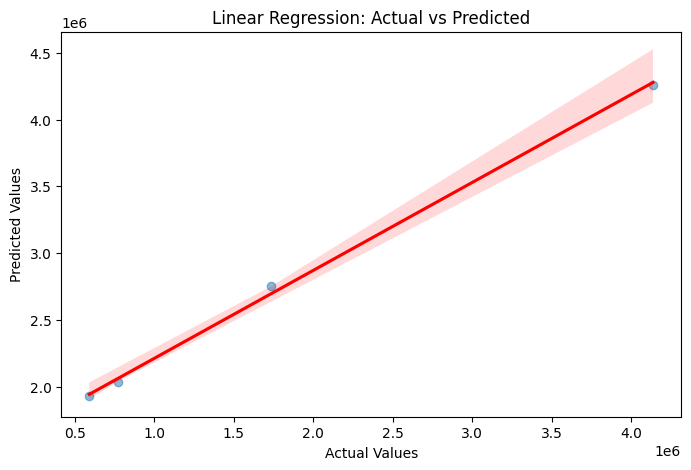

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



target_column = "Credit (Rs. in Million)"

if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Check available columns: {df.columns}")

df_numeric = df.select_dtypes(include=['number']).fillna(df.mean(numeric_only=True))

X = df_numeric.drop(columns=[target_column], errors='ignore')
y = df_numeric[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


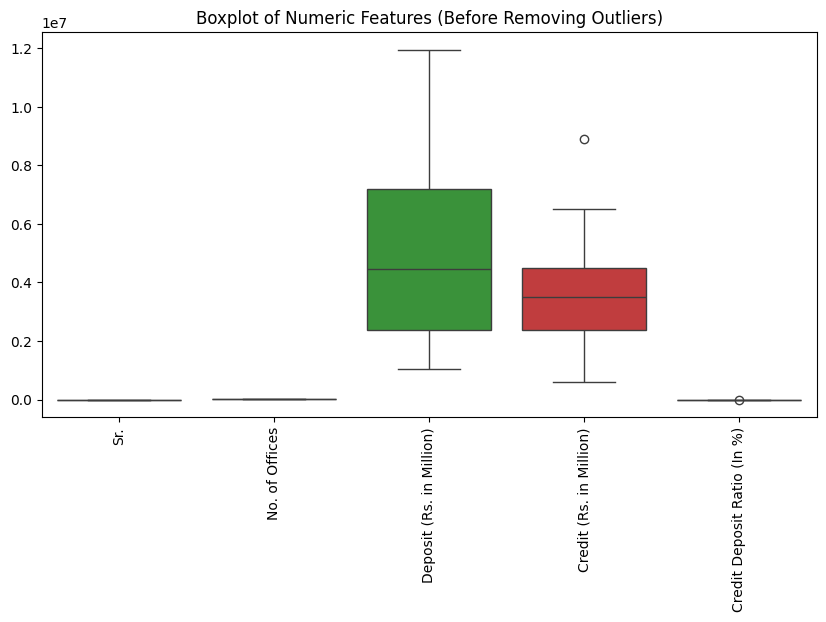

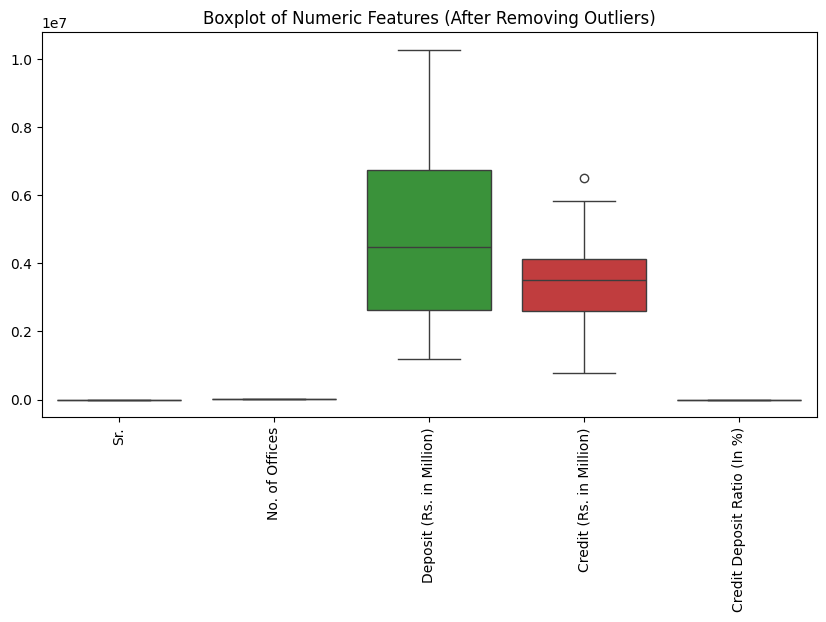


Model Performance on Original Dataset:
Mean Squared Error (MSE): 1110341293864.6472
Root Mean Squared Error (RMSE): 1053727.3337
R² Score: 0.4434

Model Performance on Dataset Without Outliers:
Mean Squared Error (MSE): 2253922003887.3379
Root Mean Squared Error (RMSE): 1501306.7654
R² Score: 0.4982


In [ ]:

target_column = "Credit (Rs. in Million)"

if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Check available columns: {df.columns}")

df_numeric = df.select_dtypes(include=['number']).fillna(df.mean(numeric_only=True))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features (Before Removing Outliers)")
plt.show()

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features (After Removing Outliers)")
plt.show()

def train_and_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    y_pred = lin_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\nModel Performance on {dataset_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

X_original = df_numeric.drop(columns=[target_column], errors='ignore')
y_original = df_numeric[target_column]
train_and_evaluate(X_original, y_original, "Original Dataset")

X_cleaned = df_no_outliers.drop(columns=[target_column], errors='ignore')
y_cleaned = df_no_outliers[target_column]
train_and_evaluate(X_cleaned, y_cleaned, "Dataset Without Outliers")
